<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning/blob/main/13_recommender_systems/4_similarity_measures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

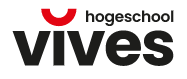<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



# Gelijkenis meten

In het topic over *clustering* hebben we datapunten opgedeeld in groepen o.b.v. gelijkenis. M.a.w. datapunten die op elkaar lijken, werden in dezelfde cluster ondergebracht. Om te bepalen hoe sterk 2 datapunten op elkaar lijken, berekenden we de afstand tussen die punten: hoe kleiner de afstand tussen de punten, hoe meer ze op elkaar lijken. Twee mogelijke afstandsmaten zijn de **Euclidische** en de **Manhattan** afstand.

Bij recommender systems wordt ook vaak de **Jaccard** en de **cosinus** afstand gebruikt, of in feite het complement van die afstanden: de Jaccard- en de cosinusgelijkenis. In het Engels spreekt men van "similarity". Uiteraard is er een verband tussen afstand en gelijkenis. Zoals we al aanhaalden is de gelijkenis tussen 2 punten groter naarmate de afstand kleiner wordt. Voor de Jaccard- en de cosinusgelijkenis geldt zelfs dat:

> `similarity = 1 - distance`

Laten we die 2 "similarity measures" eens van dichtbij bekijken.

## Jaccard-index

De **Jaccard-index** of **Jaccard similarity coefficient** is eenvoudigweg de verhouding tussen het aantal elementen in de doorsnede en de unie van 2 verzamelingen:

> $J(A,B) = \frac{|A \cap B|}{|A \cup B|}$

waarbij $|...|$ staat voor het aantal elementen in een verzameling.

In Python kunnen we gebruik maken van het `set` datatype om bewerkingen op verzamelingen uit te voeren. Stel dat we 2 verzamelingen A en B hebben:

In [ ]:
A = {'appel', 'peer', 'banaan', 'aardbei', 'kers', 'mandarijn'}
B = {'ananas', 'banaan', 'aardbei', 'kers', 'mango'}

print("A =", A)
print("B =", B)

A = {'banaan', 'peer', 'appel', 'mandarijn', 'aardbei', 'kers'}
B = {'banaan', 'mango', 'ananas', 'aardbei', 'kers'}


De doorsnede kunnen we bepalen met methode `intersection`, de unie met methode `union`:

In [ ]:
doorsnede = A.intersection(B)
unie = A.union(B)
print('A \u2229 B =', doorsnede)
print('A U B =', unie)

A ∩ B = {'aardbei', 'banaan', 'kers'}
A U B = {'banaan', 'mango', 'peer', 'ananas', 'appel', 'mandarijn', 'aardbei', 'kers'}


De Jaccard-index is dan:

In [ ]:
print("|A \u2229 B| =", len(doorsnede))
print("|A U B| =", len(unie))

J = len(doorsnede) / len(unie)
print("Jaccard-index J(A,B) =", J)

|A ∩ B| = 3
|A U B| = 8
Jaccard-index J(A,B) = 0.375


37.5% van alle elementen van A en B zitten dus in beide verzamelingen. Moest dat 100% zijn, dan vallen A en B samen, is dat 0%, dan hebben A en B geen gemeenschappelijke elementen. Dus de Jaccard-index is een maat voor de overlap tussen beide verzamelingen.

In de inleiding gaven we al aan dat de **Jaccard-afstand** gelijk is aan één min de Jaccard-index:

> $ d_J(A,B) = 1 - J(A,B) = \frac{|A \cap B|}{|A \cup B|}$

That's easy! Maar hoe kunnen we die Jaccard-index nu toepassen wanneer we met features te maken hebben? Stel dat we de volgende 2 zinnen hebben:

In [ ]:
zinnen = ["each state has its own laws",
          "every country has its own laws and its own culture"]

We stoppen nu alle woorden van de eerste zin in verzameling A, en alle woorden van de tweede zin in verzameling B. Omdat we gebruik maken van een Python `set` bevatten de verzamelingen unieke elementen! De Jaccard-index van de 2 zinnen kunnen we dan eenvoudig zoals hierboven berekenen:

In [ ]:
A = set(zinnen[0].split(" "))  # woorden van zin 1
B = set(zinnen[1].split(" "))  # woorden van zin 2
J = len(A.intersection(B)) / len(A.union(B))  # Jaccard-index
print("J(zin1, zin2) =", J)

J(zin1, zin2) = 0.4


Maar in machine learning werken in dit geval meestal met een document-term matrix (DTM):

In [ ]:
import pandas as pd
import numpy as np

bag_of_words = A.union(B)
dtm = pd.DataFrame({zin: {word: zin.count(word) for word in bag_of_words} for zin in zinnen}).T
dtm

,culture,and,country,state,each,own,has,its,laws,every
each state has its own laws,0,0,0,1,1,1,1,1,1,0
every country has its own laws and its own culture,1,1,1,0,0,2,1,2,1,1


Voor het berekenen van de Jaccard-index moeten we de DTM omzetten naar een binaire matrix:

In [ ]:
X = dtm.values.astype(bool).astype(int)
X

array([[0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 1, 1, 1, 1, 1]])

De Jaccard-index is nu gelijk aan het aantal woorden dat in beide zinnen voorkomt gedeeld door het aantal woorden dat in 1 van beide zinnen voorkomt. Dus als we de som nemen van de rijen van matrix `X`, dan is de Jaccard-index gelijk aan het aantal keren dat de som gelijk is aan 2 gedeeld door het aantal keren dat de som niet nul is:

In [ ]:
som = X.sum(axis=0)  # axis=0 want som van kolommen nemen!
som

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 1])

In [ ]:
J = np.sum(som == 2) / np.sum(som > 0)
J

0.4

Maar we kunnen voor het berekenen van de teller ook het inwendig product nemen van de 2 rijen van `X`. Dit doen we met NumPy functie `dot`:

In [ ]:
np.dot(X[0, :], X[1, :]) / np.sum((X[0, :] + X[1, :]).astype(bool))

0.4

In `SciPy` bestaat er ook een functie `jaccard` om de Jaccard-afstand (niet de Jaccard-index!) te berekenen. Om de Jaccard-index te bekomen, moeten we de return value van deze functie aftrekken van 1:

In [ ]:
from scipy.spatial.distance import jaccard

print("Jaccard-distance =", jaccard(X[0, :], X[1, :]))
print("Jaccard-index =", 1 - jaccard(X[0, :], X[1, :]))

Jaccard-distance = 0.6
Jaccard-index = 0.4


Nemen we een ander voorbeeld dat van toepassing is bij recommender systems. Hieronder zie je een aantal 6 kijkers en 2 films. De tabel geeft aan of een kijker een film heeft bekeken of niet:

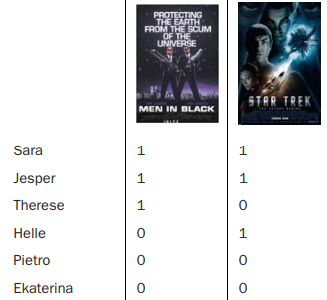

Wat is de Jaccard-index tussen "Men In Black" en "Star Trek"? We zien direct dat dit 2/4 = 0.5 is:

In [ ]:
X = np.array([[1, 1],
              [1, 1],
              [1, 0],
              [0, 1],
              [0, 0],
              [0, 0]])
print("J =", 1 - jaccard(X[:, 0], X[:, 1]))

J = 0.5


## Cosinusgelijkenis

De Jaccard-index is nuttig wanneer we met binaire variabelen zitten: een woord komt al dan niet voor in een tekst of een klant heeft een product al dan niet gekocht. Als we echter met kwantitatieve variabelen zitten, zoals het aantal keren dat een woord voorkomt in een tekst, of de rating van 1 tot 5 van een klant voor een film, dan is de **cosinusgelijkenis** interessanter, in het Engels 'cosine similarity'.

Maar om deze "similarity measure" goed te kunnen begrijpen, moeten we eerst wat driehoeksmeetkunde herhalen om uit te leggen wat de cosinus is en hoe je die berekent. Daarna leggen we uit waarom deze maat nuttig kan zijn bij recommender systems.

### Sinus en cosinus

Op de figuur hieronder wordt de betekenis uitgelegd van **sinus en cosinus**. Je hebt een $xy$-assenstelsel en een eenheidscirkel met straal 1. Neem dan een willekeurig punt op die cirkel, op de figuur in bruin aangeduid. De overeenkomstige straal van de cirkel is de bruine lijn van dat punt naar de oorsprong van het assenstelsel. Neem dan de hoek $\alpha$ tussen die lijn en de $x$-as. De cosinus van die hoek is de $x$-coördinaat van het bruine punt op de cirkel, en de sinus is de $y$-coördinaat van dat punt.

Dat betekent dat de cosinus van een hoek van 0° gelijk is aan 1 en de sinus van diezelfde hoek is 0. De cosinus van een hoek van 90° is 0 en de sinus is 1.

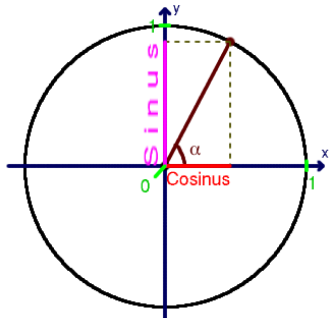

Laten we dat eens berekenen in Python. We starten met 0°.

In [ ]:
import numpy as np

In [ ]:
print("cosinus van 0° is", np.cos(0))
print("sinus van 0° is", np.sin(0))

cosinus van 0° is 1.0
sinus van 0° is 0.0


Wanneer we 90° nemen, dan klopt er iets niet.

In [ ]:
print("cosinus van 90° is", np.cos(90), "????")
print("sinus van 90° is", np.sin(90), "????")

cosinus van 90° is -0.4480736161291701 ????
sinus van 90° is 0.8939966636005579 ????


We mogen onze hoeken niet in graden ° uitdrukken maar moeten radialen nemen als eenheid. Het omzetten van graden naar radialen kan eenvoudig doordat we weten dat 180° gelijk is aan $\pi$ radialen; dus 90° is dan $\pi/2$ radialen.

In [ ]:
print(f"cosinus van 90° is {np.cos(np.pi/2):.2f}")
print(f"sinus van 90° is {np.sin(np.pi/2):.2f}")

cosinus van 90° is 0.00
sinus van 90° is 1.00


En voor een hoek van 45° moeten we natuurlijk $\pi/4$ nemen.

In [ ]:
print(f"cosinus van 45° is {np.cos(np.pi/4):.2f}")
print(f"sinus van 45° is {np.sin(np.pi/4):.2f}")

cosinus van 45° is 0.71
sinus van 45° is 0.71


Maar hoe bereken je de cosinus en de sinus van een hoek die geen deler is van 180? Door de regel van 3 toe te passen! Een hoek van 1° is $\pi/180$ radialen, en dus is een willekeurige hoek van $d$ graden gelijk aan $d\pi/180$ radialen. Neem bijvoorbeeld een hoek van 14°.

In [ ]:
print(f"cosinus van 14° is {np.cos(14*np.pi/180):.2f}")
print(f"sinus van 14° is {np.sin(14*np.pi/180):.2f}")

cosinus van 14° is 0.97
sinus van 14° is 0.24


Maar gelukkig zijn er ook de functies `deg2rad` en `rad2deg`.

In [ ]:
print(f"cosinus van 14° is {np.cos(np.deg2rad(14)):.2f}")
print(f"sinus van 14° is {np.sin(np.deg2rad(14)):.2f}")

cosinus van 14° is 0.97
sinus van 14° is 0.24


### Cosinusregel

Nu we de definities van sinus en cosinus hebben heropgefrist, zijn we klaar om de **cosinusregel** uit te leggen. Neem het punt $a$ met coördinaat $(x_a,y_a)$ en het punt $b$ met coördinaat $(x_b,y_b)$. De twee punten worden op de figuur hieronder voorgesteld in een $xy$-assenstelsel. Elk punt definieert een vector die wordt voorgesteld door een pijl die vertrekt uit de oorsprong $(0,0)$ en uitkomt in dat punt. De lengte van die vector is de Euclidische afstand tussen het punt en de oorsprong:

> $A = \sqrt{x_a^2+y_a^2}$

> $B = \sqrt{x_b^2+y_b^2}$

In de wiskunde wordt de lengte van een vector ook de norm genoemd, en dat wordt voorgesteld door de vector tussen dubbele rechte streepjes te plaatsen:

> $||a|| = A = \sqrt{x_a^2+y_a^2}$

> $||b|| = B = \sqrt{x_b^2+y_b^2}$

Omdat we kwadrateren en daarna de vierkantswortel nemen, wordt die norm soms ook aangeduid met subscript 2: $||a||_2$ en $||b||_2$. Er bestaan ook nog andere normen, zoals de 1-norm $||a||_1 = |x_a+y_a|$, die wij kennen onder de naam Manhattan afstand.

De afstand tussen de punten $a$ en $b$ kunnen we eveneens met de Euclidische afstand berekenen:

> $C = \sqrt{(x_a-x_b)^2 + (y_a-y_b)^2}$

Nu we de lengtes $A$, $B$ en $C$ kennen, kunnen we de cosinus van de hoek $\theta$ afleiden uit de volgende formule:

> $C^2 = A^2 + B^2 -2AB\cos\theta$

In het speciale geval van een rechthoekige driehoek met $\theta=90°$ vereenvoudigt deze formule tot die van de stelling van Pythagoras omdat de cosinus van $\theta$ in dat geval gelijk is aan $0$.

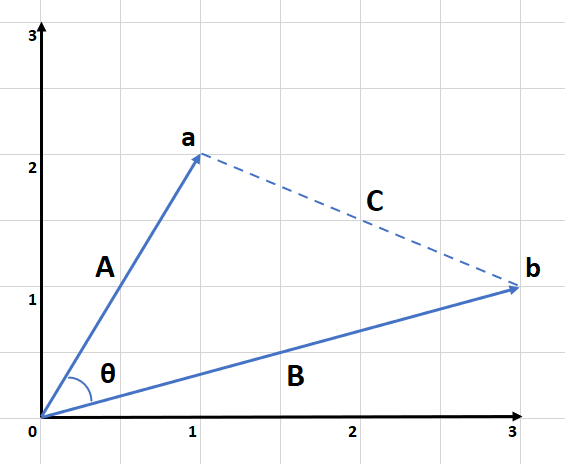

De cosinus van $\theta$ kunnen we dus afleiden uit de cosinusregel:

> $\cos\theta = \frac{C^2-A^2-B^2}{-2AB}$

### Cosinusgelijkenis

De cosinus van $\theta$ kunnen we ook berekenen m.b.v. het **inwendig product** tussen vectoren $a$ en $b$:

> $\cos\theta = \frac{a.b}{||a||_2||b||_2} = \frac{x_a x_b+y_a y_b}{\sqrt{(x_a^2+y_a^2)(x_b^2+y_b^2)}}$

Deze laatste formule die gebruik maakt van het inwendig product en de norm is de eenvoudigste om toe te passen. Dit is ook de definitie van de **cosinusgelijkenis** $S_C$ of 'cosine similarity' in het Engels. De cosinusgelijkenis is 1 wanneer twee vectoren dezelfde hoek hebben en -1 wanneer ze tegenover elkaar liggen.

Omdat het inwendig product en de norm ook gedefinieerd zijn voor vectoren in N dimensies, kunnen we die formule makkelijk uitbreiden naar meerdere dimensies. Voor twee punten $a$ en $b$ met N coördinaten $x_i$ wordt dat:

> $S_C(a,b) = \frac{a.b}{||a||_2||b||_2} = \frac{\sum_{i=1}^{N} x_{a,i} x_{b,i}}{\sqrt{\sum_{i=1}^{N}x_{a,i}^2 \sum_{i=1}^{N}x_{b,i}^2}}$


Let op! De **cosinusafstand** bestaat ook en die wordt gedefineerd als *1 min de cosinusgelijkenis*:

> cosinusafstand $ = 1 - \frac{a.b}{||a||_2||b||_2} $

Op die manier is de cosinusafstand 0 wanneer 2 vectoren dezelfde hoek hebben, wat in overeenstemming is met ons intuïtief begrip van afstand.

Laten we nu eens stap voor stap de cosinusgelijkenis in Python berekenen voor de punten $a=(1,2)$ en $b=(3,1)$:

In [ ]:
a = np.array([1, 2])
b = np.array([3, 1])

De lengte van vectoren $a$ en $b$ kunnen we eenvoudig berekenen door NumPy functies `sqrt`, `square` en `sum` toe te passen:

In [ ]:
A = np.sqrt(np.square(a).sum())
print("A =", A)
B = np.sqrt(np.square(b).sum())
print("B =", B)

A = 2.23606797749979
B = 3.1622776601683795


Maar omdat de lengte gelijk is aan de norm van de vectoren $a$ en $b$, kunnen we ook NumPy functie `norm` gebruiken uit de `linalg` module:

In [ ]:
print("A =", np.linalg.norm(a))
print("B =", np.linalg.norm(b))

A = 2.23606797749979
B = 3.1622776601683795


De Euclidische afstand $C$ tussen punten $a$ en $b$ berekenen hebben we ook reeds gezien:

In [ ]:
C = np.sqrt(np.square(a - b).sum())
print("C =", C)

C = 2.23606797749979


Er bestaat echter ook een functie `euclidean` in SciPy module `spatial.distance`:

In [ ]:
from scipy.spatial import distance

In [ ]:
print("C =", distance.euclidean(a, b))

C = 2.23606797749979


De cosinus van de hoek $\theta$ tussen de vectoren $a$ en $b$ kunnen we nu eenvoudig berekenen m.b.v. de cosinusregel:

In [ ]:
cos_theta = (C**2 - A**2 - B**2) / (-2 * A * B)
print("cosinus theta =", cos_theta)

cosinus theta = 0.7071067811865476


Dit is dus de cosinusgelijkenis tussen $a$ en $b$, die we ook kunnen berekenen met het inwendig product. Daarvoor kunnen we NumPy functie `dot` gebruiken:

In [ ]:
print("cosine simularity =", np.dot(a, b) / (A * B))

cosine simularity = 0.7071067811865475


En er is ook de SciPy functie `cosine` uit module `spatial.distance`. Maar die berekent de cosinusafstand, en dus moeten we 1 min die afstand berekenen om de cosinusgelijkenis te krijgen:

In [ ]:
print("cosine simularity =", 1 - distance.cosine(a, b))

cosine simularity = 0.7071067811865475


Dat het hier effectief over de cosinus afstand gaat, kan je checken door de afstand tussen $a$ en zichzelf te berekenen:

In [ ]:
distance.cosine(a, a)

0.0

### Pearson correlatiecoëfficiënt

Maar wat is nu het nut van die cosinusgelijkenis? Waarom nemen we niet gewoon de Euclidische afstand? Stel dat je 2 users hebt die 2 films hebben beoordeeld. De eerste user heeft 1 ster gegeven aan de eerste film en 2 sterren aan de tweede film. De tweede gebruiker heeft 2 sterren gegeven aan de eerst film en 4 aan de tweede. We kunnen user 1 dus voorstellen a.d.h.v. het punt $(1,2)$ en user 2 a.d.h.v. het punt $(2,4)$. Laten we dat eens plotten:

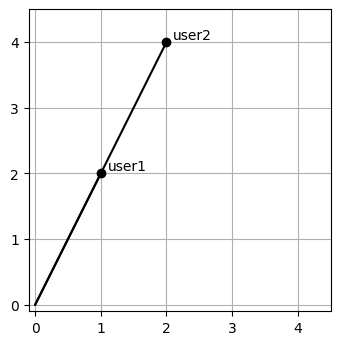

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100

users = dict(user1 = np.array([1, 2]), user2 = np.array([2, 4]))
for name, user in users.items():
    plt.plot(user[0], user[1], 'ko');
    plt.plot([0, user[0]], [0, user[1]], 'k-');
    plt.text(user[0]+0.1, user[1]+0.05, name);
plt.grid();
plt.xlim((-0.1, 4.5))
plt.ylim((-0.1, 4.5))
plt.gca().set_aspect('equal');

We zien dat beide users de tweede film twee keer zoveel sterren hebben gegeven dan de eerste. User 2 is wel 2 keer zo gul geweest als user 1. Maar als user 2 steeds (veel) minder streng is dan user 1, dan is het in dit geval niet onlogisch om te zeggen dat de gelijkenis tussen beide users maximaal is, en dus gelijk aan 1:

In [ ]:
1 - distance.cosine(users['user1'], users['user2'])

1.0

Dat verschil in meer en minder kritische gebruikers noemen we de **user bias** en die kunnen we teniet doen door de gemiddelde rating van elke user af te trekken van de ratings van die user:

In [ ]:
for name, u in users.items():
    print(name, u - u.mean())

user1 [-0.5  0.5]
user2 [-1.  1.]


De gemiddelde rating van user 1 is 1.5, die van user 2 is 3. We zien dat we nu ratings krijgen die rond 0 zijn gecentreerd, en als we met deze genormaliseerde ratings de cosinusgelijkenis berekenen, dan spreken we van de '**centered cosine similarity**', ook wel 'adjusted cosine similarity' genaamd, die equivalent is met de **Pearson correlatiecoëfficiënt**. Sommige auteurs maken in de context van recommender systems een subtiel onderscheid tussen beiden. De correlatiecoëfficiënt ligt tussen -1 en 1, waarbij 1 een perfecte overeenkomst uitdrukt, zoals in ons voorbeeldje.

De algemene formule om de Pearson correlatiecoëfficiënt te berekenen tussen twee punten $a$ en $b$ met N coördinaten $x_i$ is:

> $S_C(a,b) = \frac{\sum_{i=1}^{N} (x_{a,i} - \bar{x_a}) (x_{b,i} - \bar{x_b})}{\sqrt{\sum_{i=1}^{N}(x_{a,i}-\bar{x_a})^2 \sum_{i=1}^{N}(x_{b,i}-\bar{x_b})^2}}$

waarbij $\bar{x_a}$ en $\bar{x_b}$ het gemiddelde is van alle coördinaten van $a$ en $b$, respectievelijk:

> $ \bar{x_a} = \frac{1}{N}\sum_{i=1}^{N} x_{a,i} $

> $ \bar{x_b} = \frac{1}{N}\sum_{i=1}^{N} x_{b,i} $


Laten we dat eens illustreren met een voorbeeldje. In de figuur hieronder zie je links een tabel met ratings van 3 users (Sara, Therese en Helle) voor 2 films (The Time Traveler's Wife en Star Trek). Ernaast zijn de ratings van die 3 users in een 2D grafiek geplot. Zo krijgen we 3 punten die 3 vectoren definiëren. De hoek tussen die vectoren laat zien dat Sara en Helle dichter bij elkaar liggen dan Sara en Therese.  

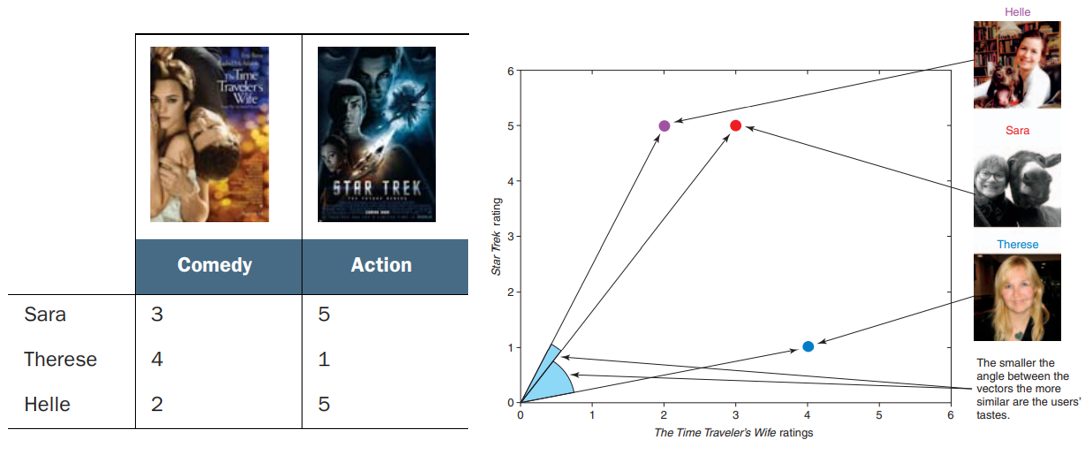

Om dat te verifiëren, berekenen we de cosinusgelijkenis. We nemen eerst de tabel over in een NumPy array, de **user-item matrix**:

In [ ]:
R = np.array([[3, 5],
              [4, 1],
              [2, 5]])
R

array([[3, 5],
       [4, 1],
       [2, 5]])

Wat is nu de cosine similarity tussen Sara en de andere gebruikers?

In [ ]:
sara = R[0, :]
therese = R[1, :]
helle = R[2, :]

print("sim(Sara,Therese) =", np.dot(sara, therese) / np.sqrt(np.sum(sara**2) * np.sum(therese**2)))
print("sim(Sara,Helle) =", np.dot(sara, helle) / np.sqrt(np.sum(sara**2) * np.sum(helle**2)))

sim(Sara,Therese) = 0.7071067811865476
sim(Sara,Helle) = 0.9872411207126471


Volgens de cosinusgelijkenis liggen de ratings van Sara en Helle dichter bij elkaar dan die van Sara en Therese. En het klopt inderdaad dat Sara en Helle bijna dezelfde ratings hebben gegeven.

Maar laten we nu eens de user bias verwijderen van de ratings om de Pearson correlatie te berekenen. Daarvoor moeten we de rating matrix `R` normaliseren door de gemiddelde rating van elke user af te trekken van diens ratings. We berekenen eerst die gemiddelde ratings:

In [ ]:
user_bias = R.mean(axis=1, keepdims=True)  # gemiddelde van elke user = gemiddelde van de rijen -> axis=1!
user_bias

array([[4. ],
       [2.5],
       [3.5]])

Als we die vector met gemiddeldes nu aftrekken van onze rating matrix `R`, dan zijn de ratings gecentreerd rond 0:

In [ ]:
Rn = R - user_bias
Rn

array([[-1. ,  1. ],
       [ 1.5, -1.5],
       [-1.5,  1.5]])

We kunnen nu dezelfde code als daarnet gebruiken om de correlatiecoëfficiënten te berekenen, alleen moeten we nu `Rn` gebruiken ipv `R`:

In [ ]:
sara = Rn[0, :]
therese = Rn[1, :]
helle = Rn[2, :]

print("pearson(Sara,Therese) =", np.dot(sara, therese) / np.sqrt(np.sum(sara**2) * np.sum(therese**2)))
print("pearson(Sara,Helle) =", np.dot(sara, helle) / np.sqrt(np.sum(sara**2) * np.sum(helle**2)))

pearson(Sara,Therese) = -1.0
pearson(Sara,Helle) = 1.0


Wat zien we nu? Als we de user bias teniet doen, dan blijken Sara en Helle hetzelfde profiel te hebben, terwijl Sara en Therese een tegengesteld profiel hebben!

We kunnen natuurlijk ook de cosinusgelijkenis tussen de films berekenen:

In [ ]:
TTW = R[:, 0]  # film 1
ST  = R[:, 1]  # film 2

print("sim(TTW,ST) =", np.dot(TTW, ST) / np.sqrt(np.sum(TTW**2) * np.sum(ST**2)))

sim(TTW,ST) = 0.7540739028638984


Om de Pearson correlatiecoëfficiënt tussen de 2 films te berekenen, moeten we de gemiddelde rating van elke film aftrekken. Dit gemiddelde noemen we de **item bias**:

In [ ]:
item_bias = R.mean(axis=0, keepdims=True)  # gemiddelde van elk item = gemiddelde van de kolommen -> axis=0!
item_bias

array([[3.        , 3.66666667]])

In [ ]:
Rn = R - item_bias
Rn

array([[ 0.        ,  1.33333333],
       [ 1.        , -2.66666667],
       [-1.        ,  1.33333333]])

Door de item bias weg te werken, zien we dat de ratings van beide films eerder tegengesteld zijn: wie de eerste film goed vond, vond de tweede niet goed, en omgekeerd! Dat wordt ook bevestigd door de correlatiecoëfficiënt:

In [ ]:
TTW = Rn[:, 0]
ST = Rn[:, 1]

print("pearson(TTW,ST) =", np.dot(TTW, ST) / np.sqrt(np.sum(TTW**2) * np.sum(ST**2)))

pearson(TTW,ST) = -0.8660254037844385


---



---
## Bronnen

* Falk, K., 2019. Practical Recommender Systems. Manning Publications.
* https://www.coursera.org/learn/basic-recommender-systems/
* https://en.wikipedia.org/wiki/Jaccard_index
* https://en.wikipedia.org/wiki/Cosine_similarity
* https://nl.wikipedia.org/wiki/Goniometrie
* https://nl.wikipedia.org/wiki/Cosinusgelijkenis
* https://nl.wikipedia.org/wiki/Cosinusregel
* https://nl.wikipedia.org/wiki/Norm_(vector)
* https://stackoverflow.com/questions/58381092/difference-between-cosine-similarity-and-cosine-distance
* https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
* https://docs.scipy.org/doc/scipy/reference/spatial.distance.html
